# 6- Lasso Regresyon - Alıştırmalar

In [1]:
# 2. Alıştırma eklendi.

## ALIŞTIRMA - 1

### Verisetinin İncelenmesi ve Manipüle Edilmesi

In [2]:
# Gerekli kütüphanelerin dahil edilmesi,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv"

fuelcons = pd.read_csv(url)
df = fuelcons.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isnull().values.any() # verisetinde bos degerler var mı?

False

In [4]:
df.info() # verisetinin bilgi cıktısını verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# modelyear veriseti bilgisinde int olarak görünüyor, aslında datetime olması gerekir.
df["MODELYEAR"] = pd.to_datetime(df["MODELYEAR"]) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   MODELYEAR                 1067 non-null   datetime64[ns]
 1   MAKE                      1067 non-null   object        
 2   MODEL                     1067 non-null   object        
 3   VEHICLECLASS              1067 non-null   object        
 4   ENGINESIZE                1067 non-null   float64       
 5   CYLINDERS                 1067 non-null   int64         
 6   TRANSMISSION              1067 non-null   object        
 7   FUELTYPE                  1067 non-null   object        
 8   FUELCONSUMPTION_CITY      1067 non-null   float64       
 9   FUELCONSUMPTION_HWY       1067 non-null   float64       
 10  FUELCONSUMPTION_COMB      1067 non-null   float64       
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64         
 12  CO2EMISSIONS        

In [7]:
df.describe() # degiskenlerin istatistiksel degerleri

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
df.corr() # verisetinin degiskenleri arasındaki korelasyon durumu

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


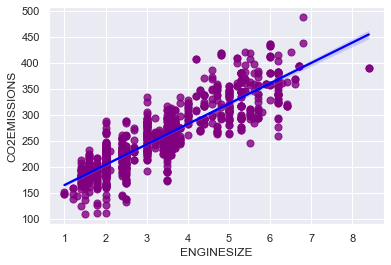

In [9]:
# enginesize ve co2emission görsel durumu
sns.set_theme(color_codes = True)
sns.regplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', color = 'blue', scatter_kws = {'s': 50, 'color' : 'purple'});

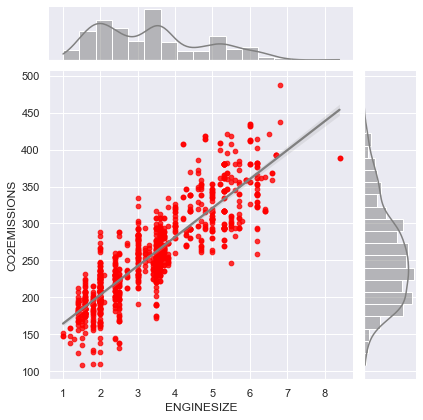

In [10]:
sns.jointplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', kind = 'reg', color = 'gray', scatter_kws = {'color': 'red', 's':22});

### Model Kurulumu

In [11]:
df1 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']] # sürekli degiskenler
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


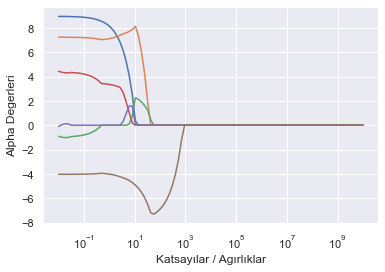

In [12]:
# katsayılar durumunun görsellestirilmesi,

X = df1.drop('CO2EMISSIONS', axis = 1) # bagımsız degiskenler (co2emissions haricindekileri alır)
y = df1['CO2EMISSIONS'] # bagımsız degisken

# %80 egitim, %20 egitim seti,
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)

alphalar = 10 ** np.linspace(10, -2, 100) * 0.5 # farklı alpha degerleri
katsayilar = []

lasso = Lasso() # model nesnesi olsuturur


for i in alphalar:
    lasso.set_params(alpha = i)
    model = lasso.fit(X_train, y_train) # modelin fit edilmesi
    katsayilar.append(model.coef_)

ax = plt.gca()
ax.plot(alphalar * 2, katsayilar)
ax.set_xscale('log')

plt.axis('tight')
plt.ylabel('Alpha Degerleri')
plt.xlabel('Katsayılar / Agırlıklar');

* Katsayıları 0 degerine ulastırdı

In [13]:
min(katsayilar[0])

0.0

### Model Tuning / Model Doğrulama

In [38]:
# optimum alpha degerinin bulunması
lasso_cv = LassoCV(alphas = None,
                cv = 10,
                max_iter = 1000,
                normalize = True)

model2 = lasso_cv.fit(X_train, y_train)
model2.alpha_ # optimum alpha degeri

/home/mrkizmaz/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.003936249480428392

In [39]:
# final modelinin olusturulması ve hata degerinin hesaplanması,
lasso_tuned = Lasso(alpha = model2.alpha_)
model_final = lasso_tuned.fit(X_train, y_train)

ypred = model_final.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ypred)) # hata degeri (RMSE)

rscore = model_final.score(X_train, y_train) # modelin basarı oranı

In [40]:
rmse

19.975317191240414

In [41]:
rscore

0.8852588131614365

In [42]:
print(f"Modelin basarı yüzdesi: {rscore * 100} \nModelin hata degeri: {rmse}")

Modelin basarı yüzdesi: 88.52588131614365 
Modelin hata degeri: 19.975317191240414


### Sonuç

* Lasso regresyon modeli ile edilen optimum degerler;
    * Modelin basarı yüzdesi: 88.52588131614365 
    * Modelin hata degeri: **19.975317191240414**

Bu uygulamada da görüldüğü üzere cross validation uygulandıktan sonra optimum hata degeri elde edildi.

* Aynı veriseti üzerinde,
    * PCR regresyon modelinde optimum hata degeri: **21.51203259544392** olarak bulundu.
    * PLS regresyon modelinde optimum hata degeri: **21.28182557765404** olarak bulundu.
    * Ridge regresyon modelinde optimum hata degeri: **19.985272655300285** olarak bulundu.

## ALIŞTIRMA - 2

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/BTC-USD.csv) indirebilirsiniz.

In [3]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/BTC-USD.csv"

btc_usd = pd.read_csv(url, index_col = ['Date'])
df = btc_usd.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-13,57343.371094,61683.863281,56217.972656,61243.085938,61243.085938,6.066983e+10
2021-03-14,61221.132813,61597.917969,59302.316406,59302.316406,59302.316406,4.390123e+10
2021-03-15,59267.429688,60540.992188,55393.164063,55907.199219,55907.199219,6.641937e+10
2021-03-16,55840.785156,56833.179688,53555.027344,56804.902344,56804.902344,5.974980e+10
2021-03-17,56825.828125,58969.816406,54528.628906,58870.894531,58870.894531,6.025831e+10


In [4]:
df.isnull().values.any() # verisetinde bos degerler var mı?

True

In [5]:
df[df.isnull().any(axis = 1)] # bos degerler hangi satırda?

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-12,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum() # bos degerler nerede ve kac tane var?

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df = df.dropna() # bos degerlerin oldugu satırı siler

In [8]:
df.isnull().values.any()

False

In [9]:
df.info() # veriseti hakkında bilgi verir

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2021-03-13 to 2022-03-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       365 non-null    float64
 1   High       365 non-null    float64
 2   Low        365 non-null    float64
 3   Close      365 non-null    float64
 4   Adj Close  365 non-null    float64
 5   Volume     365 non-null    float64
dtypes: float64(6)
memory usage: 20.0+ KB


In [10]:
df = df.drop(['Adj Close'], axis = 1) # Close ve AdjClose klonları aynı degerlere sahip
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-13,57343.371094,61683.863281,56217.972656,61243.085938,6.066983e+10
2021-03-14,61221.132813,61597.917969,59302.316406,59302.316406,4.390123e+10
2021-03-15,59267.429688,60540.992188,55393.164063,55907.199219,6.641937e+10
2021-03-16,55840.785156,56833.179688,53555.027344,56804.902344,5.974980e+10
2021-03-17,56825.828125,58969.816406,54528.628906,58870.894531,6.025831e+10


In [11]:
df.corr() # verisetinin gözlemleri arasındaki korelasyon

,Open,High,Low,Close,Volume
Open,1.000000,0.993427,0.986870,0.981471,0.363396
High,0.993427,1.000000,0.986737,0.991491,0.386418
Low,0.986870,0.986737,1.000000,0.991451,0.283163
Close,0.981471,0.991491,0.991451,1.000000,0.333019
Volume,0.363396,0.386418,0.283163,0.333019,1.000000


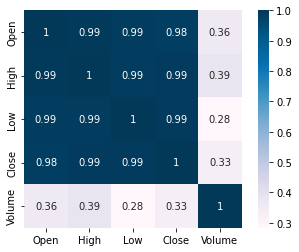

In [14]:
sns.heatmap(df.corr(), square = True, annot = True, cmap = 'PuBu');

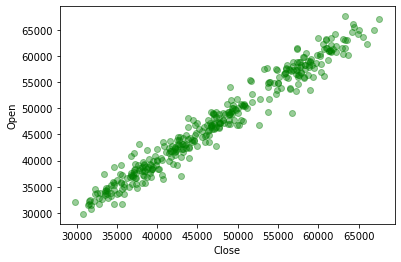

In [23]:
plt.scatter(df['Open'], df['Close'], color = 'green', alpha = 0.4)
plt.xlabel('Close')
plt.ylabel('Open');

### Model Kurulumu

In [31]:
X = df.drop(['Close'], axis = 1) # bagımsız degiskenler
y = df['Close'] # bagımlı degisken

# %20'si test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# optimum alpha degerinin bulunması
alphalar = 1000 ** np.linspace(10, -2, 100) * 0.5 # random alpha degerleri
lassocv = LassoCV(alphas = alphalar, max_iter = 10000, cv = 10)
lassocv = lassocv.fit(X_train, y_train)

# optimum alpha degeriyle model olusumu
lassomodel = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)
score = lassomodel.score(X_train, y_train)
ypred = lassomodel.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ypred))

print(f"Modelin basarı degeri: {score} ve hata degeri: {rmse}")

Modelin basarı degeri: 0.9929413728154944 ve hata degeri: 597.6970511682217


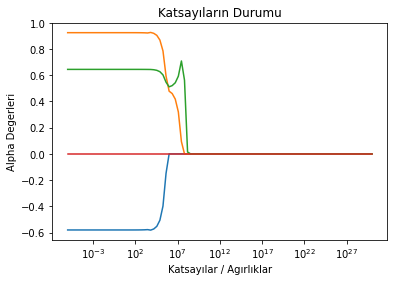

In [32]:
# katsayılar durumunun görsellestirilmesi
lasso = Lasso()
katsayilar = []

for i in alphalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphalar * 2, katsayilar)
ax.set_xscale('log')

plt.axis('tight')
plt.title('Katsayıların Durumu')
plt.ylabel('Alpha Degerleri')
plt.xlabel('Katsayılar / Agırlıklar');

### Sonuç

* Modelin basarı degeri: 0.9929413728154944 ve hata degeri: 597.6970511682217